In [39]:
%matplotlib inline
import numpy as np
import numpy.ma as ma #numpy package to mask values
import matplotlib.pyplot as plt
import scipy.integrate as integrate

print "425 HW 5 - Friedmann Equation and Gravitational Arcs"
print "Winnie Wang, Prof. Andrew Connolly"

425 HW 5 - Friedmann Equation and Gravitational Arcs
Winnie Wang, Prof. Andrew Connolly


To integrate the Big Crunch and 'loitering' universes, we need to integrate:

$\int_{0}^{a} \frac{da}{[{{\Omega_{r,0}}{{a}^{-2}} + {\Omega_{m,0}}{a}^{-1} + \Omega_{\Lambda,0}a + (1 - \Omega_0)]}^{\frac{1}{2}}} = H_0 t \rightarrow \int_{0}^{a} \frac{da}{[{{\Omega_{r,0}}{{a}^{-2}} + {\Omega_{m,0}}{a}^{-1} + \Omega_{\Lambda,0}a + (1 - \Omega_0)]}^{\frac{1}{2}}}(\frac{1}{H_0}) = t$

In both cases, the $\Omega_{r,0}$ has to be zero because as $\Omega_{r,0}$ approaches 1, integral quickly approaches to some solution only containing $\Omega_{r,0}$, leading to a flat, radiation-only universe. Since this cannot be the case, $\Omega_{r,0}$ is zero in both 'loitering' and Big Crunch universes.

To integrate, a class called "Friedmann" is implemented because an exception when the integral cannot be evaluated where $a(t)$ at 0 needs to be thrown. This makes intuitive sense because the denominator of the values (below 'da') cannot be infinity, or otherwise the integral cannot be evaluated. There are two functions in the class: one as "__init__" that calls the function itself and "Hubble_Time" that represents the integral (which evaluates to some 't'). 

The class is then called at both loitering and Big Crunch universes in 'for' loops against a linear space (of a(t)) that fills some empty array, with $\Omega_{r,0}$ and $\Omega_{l,0}$ referenced from the book. 

The integrals still run despite the '0' in the integral because the 'for' loops allow NaN to pass through. Moreover, the integrals of the 'Big Crunch' universe are run twice because the integral stops after being evaluated for the first half. To continue the integration, a separate array that contains error values then evaluated for a maximum value that would constitute the initial value for evaluation in the second half of integral.

In [30]:
print "This is Question 1."
#Constants:
H_0 = 2.268e-18 #Hubble constant scaled to 1/s
gyr_scale = 3600*24*365*1e9 #to change from seconds to giga-years

#Class to integrate the Friedmann Equation:
#The class is implemented so that errors can be returned if there is an invalid 't' for some a(t)
class Friedmann:
    def __init__(self,r,m,l):
        self.H_0 = H_0
        self.r = r #omega_r
        self.m = m #omega_m
        self.l = l #omega_l
        self.omega = (self.r + self.m + self.l)
        pass
    
    def Hubble_Time(self, a):
        t = np.sqrt(1/(self.H_0**2.0*(self.r*(a**-2.0)+ self.m*(a**-1.0) + self.l*(a**2.0) + (1.0 - self.omega + 0.j))))
        if t.imag == 0.j:
            return abs(t)
        else:
            pass

This is Question 1.


In [31]:
#Integrating:       
print "Part A: Integrating to obtain loitering universe."
loiter_a = np.linspace(0.0,1.0,100)
loitering_array = []

loitering = Friedmann(0.0,0.3,1.7134) #omega_m and omega_l referenced from book; omega_r is supposed to be zero
def integrate_loitering(x):
    try:
        return integrate.quad(loitering.Hubble_Time,0.0,i)
    except:
        return np.nan,np.nan
        
for i in loiter_a:
    loitery = integrate_loitering(i)
    loitering_array.append(loitery)
    
loitering_array_scaled = np.asarray(loitering_array)/gyr_scale

Part A: Integrating to obtain loitering universe.


In [34]:
#Part B:
print "Part B: Integrating to obtain 'Big Crunch' universe."
big_crunch = Friedmann(0.0,0.3,-0.3) 
#Since the integral will only run to only half of the whole thing, the other half is integrated explicitly
#Masked arrays are initialized to ignore the a(t) values that cannot be integrated, so we can graph

crunchy_a_increasing = np.linspace(0.0,2.0,1000)        
crunchy_array = []

def integrate_crunchy(x): #first half that's increasing
    try:
        return integrate.quad(big_crunch.Hubble_Time,0.0,x)
    except:
        return np.nan,np.nan        

for j in crunchy_a_increasing:
    crunchy,err = integrate_crunchy(j)
    crunchy_array.append(crunchy)
    
crunchy_array_scaled = np.asarray(crunchy_array)/gyr_scale
crunchy_array_scaled_error = ma.masked_invalid(crunchy_array_scaled)
crunchy_a2 = ma.masked_array(crunchy_a_increasing,mask=crunchy_array_scaled_error.mask)

#-----------#

crunchy_a_decreasing = np.linspace(crunchy_a2.max(),0,1000)
crunchy_array2 = []

def integrate_crunchy2(x): #other half that is decreasing
    try:
        return integrate.quad(big_crunch.Hubble_Time,crunchy_a2.max(),x)
    except:
        return np.nan,np.nan
        
for k in crunchy_a_decreasing:
    crunchy2,err = integrate_crunchy2(k)
    crunchy_array2.append(crunchy2)
    
crunchy_array_scaled2 = np.asarray(crunchy_array2)/gyr_scale

Part B: Integrating to obtain 'Big Crunch' universe.


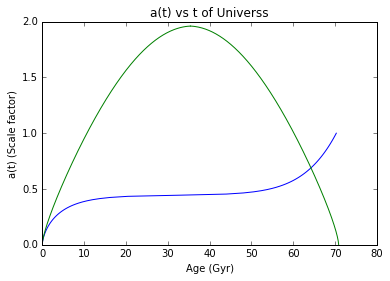

In [36]:
#Loitering universe; blue
loiter_line = plt.plot(loitering_array_scaled, loiter_a, label='Loitering') 
#Big Crunch universe; green
big_crunch_line = plt.plot(crunchy_array_scaled_error, crunchy_a2, c='g', label='Big Crunch')
big_crunch_line2 = plt.plot((crunchy_array_scaled_error.max()-crunchy_array_scaled2), crunchy_a_decreasing, c='g')
plt.title("a(t) vs t of Universs")
plt.xlabel('Age (Gyr)')
plt.ylabel('a(t) (Scale factor)')

Question 2:

An isothermal sphere with a density profile of:

$\rho(r) = \frac{{\sigma_\nu}^{2}}{2\pi G{r}^{2}}$

Will have a mass of (given some radius, R):

$M(R) = \frac{4\pi {R}^{3}}{3} * \rho(r) = \frac{4\pi {R}^{3}}{3} * \frac{{\sigma_\nu}^{2}}{2\pi G{r}^{2}} = \frac{2{\sigma_\nu}^{2} R}{3G}$

Given that the Einstein radius is:

${\theta_E}^{2} = \frac{4 G M D_LS}{{c}^{2}D_L D_S}$

Rearranging this expression for a mass in a sphere with this radius yields:

$M = \frac{{\theta_E}^{2}{c}^{2} D_L D_S}{4 G D_{LS}}$

So an isothermal sphere with an Einstein radius must be solved with a mass of:

$\frac{{\theta_E}^{2}{c}^{2} D_L D_S}{4 G D_{LS}} \approx \frac{2{\sigma_\nu}^{2} R}{3G}$

In very long distances, note that the small-angle approximation can be applied, where $\theta$ or in this case, $(\theta_E) \approx \frac{R}{D_L}$. Consequently:

$\frac{{\theta_E}^{2}{c}^{2} D_L D_S}{4 G D_{LS}} \approx \frac{2{\sigma_\nu}^{2} R}{3G} \rightarrow \frac{{\theta_E}^{2}{c}^{2} D_L D_S}{4 G D_{LS} R} \approx \frac{2{\sigma_\nu}^{2}}{3G} \rightarrow \frac{\theta_E{c}^{2} D_S}{4 G D_{LS}} \approx \frac{2{\sigma_\nu}^{2}}{3G}$

Solving for the velocity dispersion results to:

${\sigma_\nu}^{2} \approx \frac{3\theta_E{c}^{2} D_S}{8 D_{LS}} \rightarrow {\sigma_\nu} \approx {(\frac{3\theta_E{c}^{2} D_S}{8 D_{LS}})}^{\frac{1}{2}}$

Since there are 206265 arcseconds in a radian, converting this to arcseconds approximates this to:

${\sigma_\nu} \approx {(\frac{3\theta_E{c}^{2} D_S}{8 D_{LS}})}^{\frac{1}{2}} = {(\frac{\theta_E D_S}{D_{LS}})}^{(\frac{1}{2}}{\frac{3{c}^{2}}{8(206265'')})}^{\frac{1}{2}} = {10}^{3}{kms}^{-1}{\frac{\theta_E D_S}{28'' D_{LS}}}^{\frac{1}{2}}$